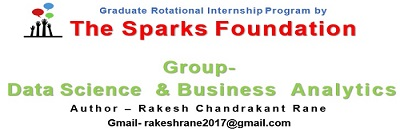

## Task 1- Prediction using Supervised ML
### Problem Statement - Predict the percentage of an student based on the no. of study hours. 
### This is a simple linear regression task as it involves just 2 variables.
### What will be predicted score if a student studies for 9.25 hrs/ day?


 # 1) Data Preprocessing and Visualization

In [2]:
# Import library for data processing
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
df = pd.read_csv('student_scores.csv') # loading csv file
df.head(5) # showing 1st five raw of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe() # all statistical information of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
Hours = df.iloc[:,0]
scores = df.iloc[:,1]

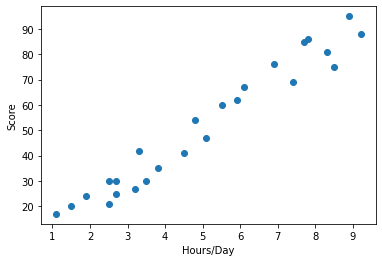

In [6]:
# data visulization
plt.scatter(Hours, scores)
plt.xlabel('Hours/Day')
plt.ylabel('Score')
plt.show()

# 2) Building a ML Model

## A) Model Training


In [7]:
# import library for Trainig model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [9]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

# spitting data into tarin data and test data
# 80% data use for training and 20% data use for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Training alogrithm
model = LinearRegression()
model.fit(x_train,y_train)

print(" Training successfully complete!")

# model paramter
y_intercept = model.intercept_
line_slope = model.coef_
print("intercept: "+ str(y_intercept) + " | slope of line : " + str(line_slope))


 Training successfully complete!
intercept: 1.8267939683908168 | slope of line : [9.93772914]


## B) Plotting a result

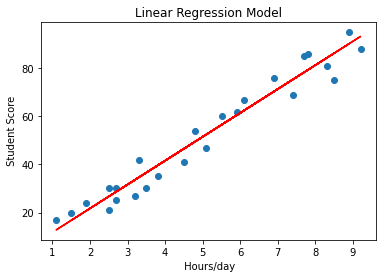

In [10]:
line = line_slope * x + y_intercept

plt.scatter(x,y)
plt.plot(x,line, 'r')
plt.title("Linear Regression Model")
plt.xlabel(" Hours/day")
plt.ylabel(" Student Score")
plt.show()

## C) Model Testing

In [11]:
# predict out for x- test data
y_predict = model.predict(x_test)

# compartion between actual value to predicted value
table = pd.DataFrame({'Actual value ': y_test, 'Predicted value': y_predict})
print(table)

   Actual value   Predicted value
0             69        75.365990
1             85        78.347308
2             76        70.397125
3             75        86.297492
4             62        60.459396


In [12]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_predict)
print(" Mean Absolute Error of LR Model: ", MAE)

 Mean Absolute Error of LR Model:  6.291930396629949


## D) preditcion of Own data

In [16]:
hours = float(input('Enter your daily hours study: '))
hours1 = [[hours]]
score = model.predict(hours1)
print("Hallo student! if you study  {} hours/day, then you will get {:.2f} %  marks".format(hours, score[0]))
print("Best Of Luck!")


Enter your daily hours study: 9.25
Hallo student! if you study  9.25 hours/day, then you will get 93.75 %  marks
Best Of Luck!


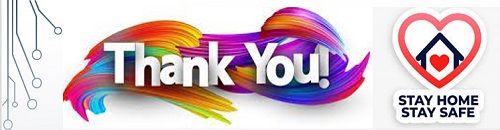